# Import Packages

In [56]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp

from utils_file.tools import load_cache_file

warnings.filterwarnings("ignore")
path = "figure_file"

# Load Data

In [2]:
stable_pairs = load_cache_file("data_file/static_strategy/ap_reward_result_test.pkl")

# Comparison Target: Reduced S&P500 constituent

In [5]:
test_data = pd.read_csv("data_file/test_PT.csv", encoding="UTF-8")
tickers = test_data["Ticker"].unique()

In [6]:
# Add daily log return to the original stock price data
BB_value = []

for ticker in tickers:
    temp = test_data[test_data["Ticker"] == ticker]
    temp["ma_line"] = temp["Close"].rolling(window=5).mean()
    std = temp["Close"].rolling(window=5).std()
    temp["upper_bound"] = temp["ma_line"] + std
    temp["lower_bound"] = temp["ma_line"] - std
    temp["log_rtn"] = np.log(temp["Close"] / temp["Close"].shift(1))
    temp = temp.dropna()
    BB_value.append(temp)

test_append = pd.concat(BB_value, ignore_index=True)

In [7]:
# Divide the stock price data of individual stocks according to each month
split_test = {}

unique_years = test_append["Year"].unique()
unique_months = test_append["Month"].unique()

idx = 1
for year in unique_years:
    for month in unique_months:
        split_test[f"state_{idx}"] = {}

        date_mask = (test_append["Year"] == year) & (test_append["Month"] == month)
        mask_table = test_append[date_mask]

        for ticker in tickers:
            split_test[f"state_{idx}"][ticker] = mask_table[
                mask_table["Ticker"] == ticker
            ]

        idx += 1

In [8]:
# 每一支成分股都執行一次 B&H 交易策略
trading_result_BandH = {}

for state in list(split_test.keys()):
    all_ticker_reward = []

    for ticker in tickers:
        all_ticker_reward.append(split_test[state][ticker]["log_rtn"].sum())

    trading_result_BandH[state] = all_ticker_reward

In [49]:
trading_table_BandH = pd.DataFrame(trading_result_BandH, index=tickers)
stable_pairs_table = pd.DataFrame(stable_pairs).T

In [53]:
trading_table_BandH.columns = stable_pairs_table.columns
plot_data_merge = pd.concat([stable_pairs_table, trading_table_BandH], axis=0)
plot_data_merge["type"] = ["stable pairs"] * len(stable_pairs_table) + ["single assets"] * len(trading_table_BandH)

plot_data_merge = plot_data_merge.melt(id_vars="type", var_name="Time", value_name="Value")
plot_data_merge["Time"] = plot_data_merge["Time"] + 1

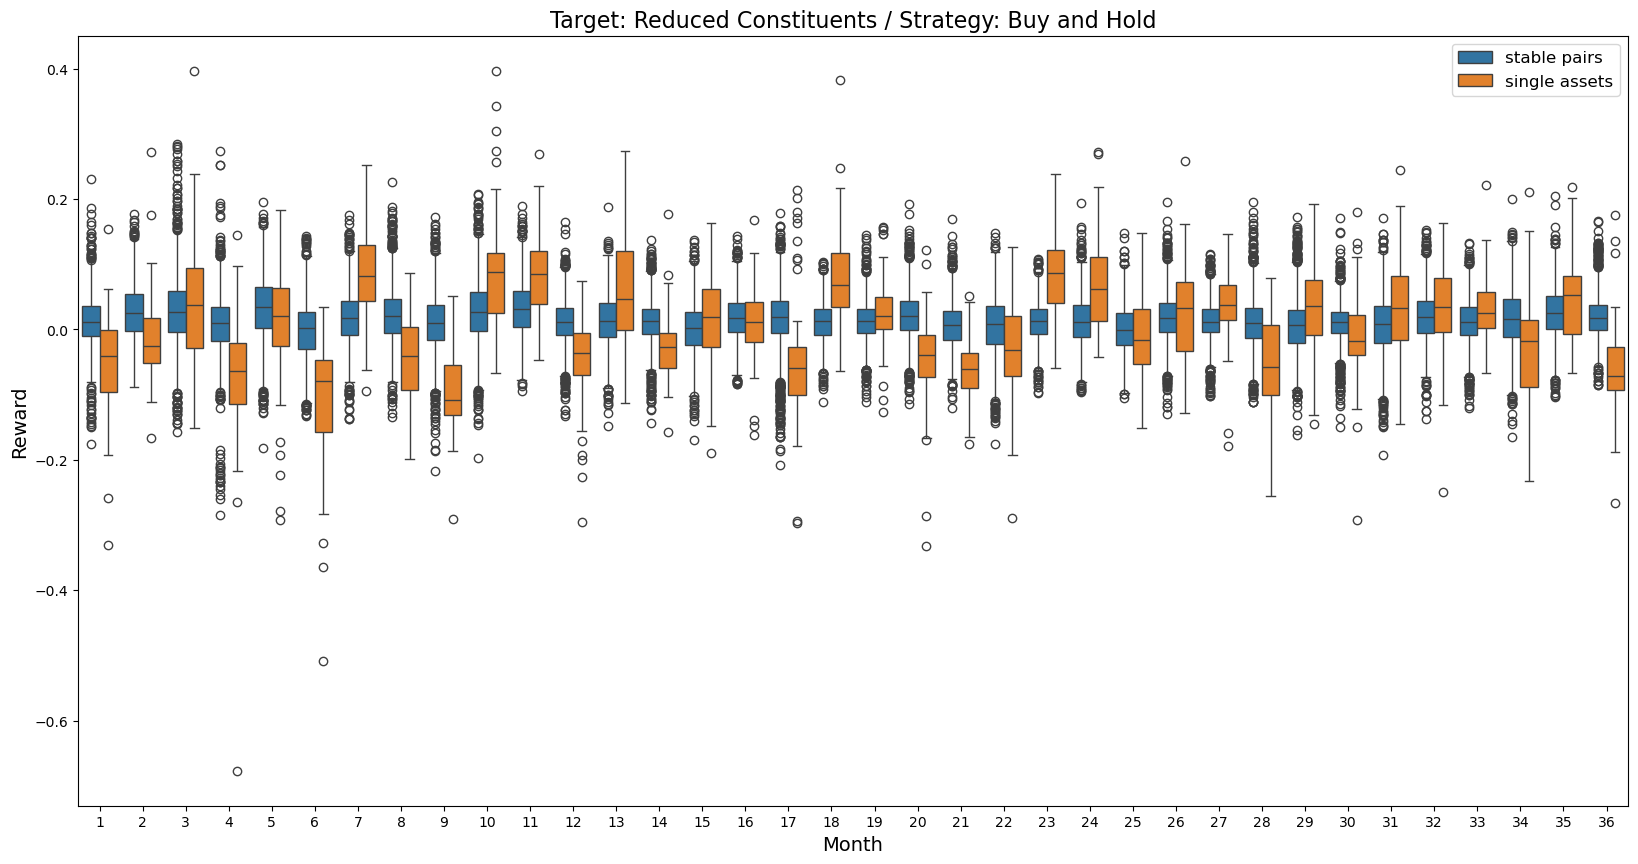

In [55]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=plot_data_merge, x="Time", y="Value", hue="type")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Reward", fontsize=14)
plt.legend(fontsize=12)
plt.title("Target: Reduced Constituents / Strategy: Buy and Hold", fontsize=16)
plt.show()

In [59]:
each_month_pvalue = []

for time in plot_data_merge["Time"].unique():
    x = plot_data_merge[(plot_data_merge["Time"] == time) & (plot_data_merge["type"] == "stable pairs")]["Value"]
    y = plot_data_merge[(plot_data_merge["Time"] == time) & (plot_data_merge["type"] == "single assets")]["Value"]
    statistic, p_value = ks_2samp(x, y, alternative="greater")
    print(f"p-value: {p_value: .4f}")

p-value:  0.9705
p-value:  0.8671
p-value:  0.0246
p-value:  0.9764
p-value:  0.6549
p-value:  1.0000
p-value:  0.0000
p-value:  1.0000
p-value:  1.0000
p-value:  0.0000
p-value:  0.0000
p-value:  1.0000
p-value:  0.0000
p-value:  0.9586
p-value:  0.0007
p-value:  0.5032
p-value:  0.2351
p-value:  0.0000
p-value:  0.0057
p-value:  0.9907
p-value:  1.0000
p-value:  0.8862
p-value:  0.0000
p-value:  0.0000
p-value:  0.4260
p-value:  0.0001
p-value:  0.0000
p-value:  1.0000
p-value:  0.0000
p-value:  0.1881
p-value:  0.0000
p-value:  0.0028
p-value:  0.0067
p-value:  0.8307
p-value:  0.0000
p-value:  0.8513
